In [1]:
pip install datapackage

     |████████████████████████████████| 92kB 4.4MB/s 
     |████████████████████████████████| 71kB 6.5MB/s 
     |████████████████████████████████| 81kB 6.4MB/s 
     |████████████████████████████████| 51kB 5.0MB/s 
     |████████████████████████████████| 133kB 28.7MB/s 
     |████████████████████████████████| 133kB 51.9MB/s 
     |████████████████████████████████| 245kB 52.2MB/s 
     |████████████████████████████████| 7.2MB 47.3MB/s 
     |████████████████████████████████| 71kB 6.0MB/s 
  Created wheel for unicodecsv: filename=unicodecsv-0.14.1-cp36-none-any.whl size=10768 sha256=e5eaeb82562a247debf986dcd609d95a968648fd32c4c600ce4134e8976ba4ff
  Stored in directory: /root/.cache/pip/wheels/a6/09/e9/e800279c98a0a8c94543f3de6c8a562f60e51363ed26e71283
  Created wheel for linear-tsv: filename=linear_tsv-1.1.0-cp36-none-any.whl size=7382 sha256=c374089c2ff672df29fedee4d696c2b38e737f817c32cf23f474567729591551
  Stored in directory: /root/.cache/pip/wheels/3f/8a/cb/38917fd1ef4356b9870ace733

In [3]:
import datapackage
import pandas as pd

data_url = 'https://datahub.io/machine-learning/diabetes/datapackage.json'

# to load Data Package into storage
package = datapackage.Package(data_url)

# to load only tabular data
resources = package.resources
for resource in resources:
    if resource.tabular:
        data = pd.read_csv(resource.descriptor['path'])
        print (data)

     preg  plas  pres  skin  insu  mass   pedi  age            class
0       6   148    72    35     0  33.6  0.627   50  tested_positive
1       1    85    66    29     0  26.6  0.351   31  tested_negative
2       8   183    64     0     0  23.3  0.672   32  tested_positive
3       1    89    66    23    94  28.1  0.167   21  tested_negative
4       0   137    40    35   168  43.1  2.288   33  tested_positive
..    ...   ...   ...   ...   ...   ...    ...  ...              ...
763    10   101    76    48   180  32.9  0.171   63  tested_negative
764     2   122    70    27     0  36.8  0.340   27  tested_negative
765     5   121    72    23   112  26.2  0.245   30  tested_negative
766     1   126    60     0     0  30.1  0.349   47  tested_positive
767     1    93    70    31     0  30.4  0.315   23  tested_negative

[768 rows x 9 columns]
     preg  plas  pres  skin  insu  mass   pedi  age            class
0       6   148    72    35     0  33.6  0.627   50  tested_positive
1       1 

In [4]:
title="class"
new_data=(data.iloc[:,:]) ##Seleção da todas as linhas e colunas
df1=new_data[title]#pd.get_dummies(df[title],drop_first=False)

In [7]:
new_data

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,tested_negative
764,2,122,70,27,0,36.8,0.340,27,tested_negative
765,5,121,72,23,112,26.2,0.245,30,tested_negative
766,1,126,60,0,0,30.1,0.349,47,tested_positive


In [10]:
def categoriza(s):
    if s == 'tested_negative':
       return 0
    else:
       return 1

new_data['class'] = df1.apply(categoriza)

In [11]:
new_data

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [25]:
x=new_data.iloc[:,:-1].values
y=new_data['class'].values

In [26]:
x

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [27]:
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [29]:
from sklearn.preprocessing import StandardScaler


## Matriz de covariância ##
#normalização 
sc = StandardScaler()
X= sc.fit_transform(x)
X

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [31]:
import numpy as np

cov = np.cov(X.T) 
eigenvalues, eigenvectors = np.linalg.eig(cov)



In [34]:
import matplotlib.pyplot as plt

tot_soma = sum(eigenvalues)
var_exp = [(i / tot_soma) for i in sorted(eigenvalues, reverse=True)] #do maior para o menor valor de autovalores
cum_var_exp = np.cumsum(var_exp)


In [37]:
X.shape[1]

8

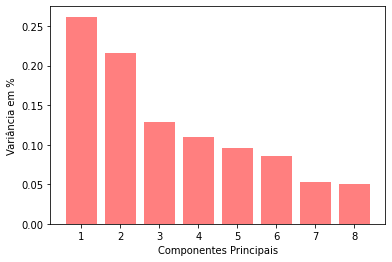

In [38]:

plt.bar( range(1,X.shape[1]+1), var_exp, alpha=0.5, color = 'r')

plt.ylabel('Variância em %')
plt.xlabel('Componentes Principais')

plt.show()

In [40]:
# Primeiro, ordenaremos os pares autovalores e autovetores
eigen_pares = [(np.abs(eigenvalues[i]), eigenvectors[:, i]) for i in range(len(eigenvalues))] 

eigen_pares.sort(key=lambda k: k[0], reverse=True)    #ordenando os pares do maior para o menor valor

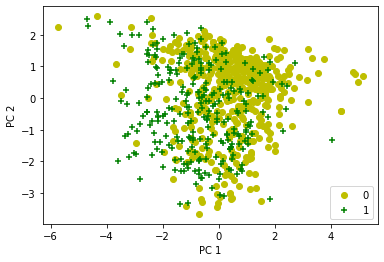

In [41]:
#selecionando dois vetores que representam os dois maiores autovalores
w = np.hstack((eigen_pares[0][1][:, np.newaxis], eigen_pares[1][1][:, np.newaxis]))

#pegando p espaço o de PCA para transformá-la através da matriz obtida de dois maiores autovalores
X_pca = X.dot(w)


colors = ['y', 'g', 'r']
markers = ['o', '+', 'v']
for l, c, m in zip(np.unique(y), colors, markers): plt.scatter(X_pca[y==l, 0], X_pca[y==l, 1], c=c, label=l, marker=m ) 
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower right')
plt.show()

Text(0.5, 0, 'PCs')

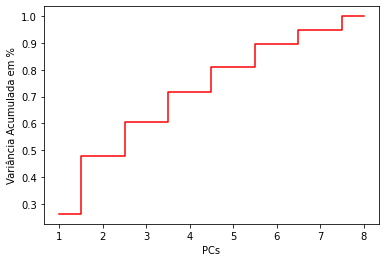

In [42]:
plt.step( range(1,X.shape[1]+1), cum_var_exp, where='mid', color = 'r')
plt.ylabel('Variância Acumulada em %')
plt.xlabel('PCs')

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3)

In [46]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, random_state=0)
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
